In [74]:
import pandas as pd
import seaborn as sns

In [75]:
benchmark = pd.read_csv('modifiable-benchmark.csv')
benchmark.insert(1, 'Path Present', benchmark['Path Length'] != 0, True)
benchmark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Algorithm            4000 non-null   object 
 1   Path Present         4000 non-null   bool   
 2   Path Length          4000 non-null   int64  
 3   Path Weight          4000 non-null   float64
 4   Duration (µs)        4000 non-null   float64
 5   Visited Vertices     4000 non-null   int64  
 6   Average Degree       4000 non-null   float64
 7   Average Path Degree  4000 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 222.8+ KB


In [76]:
benchmark_path = benchmark[benchmark['Path Present']]
benchmark_path.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2552 entries, 1 to 3999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Algorithm            2552 non-null   object 
 1   Path Present         2552 non-null   bool   
 2   Path Length          2552 non-null   int64  
 3   Path Weight          2552 non-null   float64
 4   Duration (µs)        2552 non-null   float64
 5   Visited Vertices     2552 non-null   int64  
 6   Average Degree       2552 non-null   float64
 7   Average Path Degree  2552 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 162.0+ KB


In [77]:
benchmark_nopath = benchmark[benchmark['Path Present'] == False]
benchmark_nopath.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1448 entries, 0 to 3998
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Algorithm            1448 non-null   object 
 1   Path Present         1448 non-null   bool   
 2   Path Length          1448 non-null   int64  
 3   Path Weight          1448 non-null   float64
 4   Duration (µs)        1448 non-null   float64
 5   Visited Vertices     1448 non-null   int64  
 6   Average Degree       1448 non-null   float64
 7   Average Path Degree  1448 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 91.9+ KB


# Duration of algorithms where a path is present vs not present

<Axes: xlabel='Algorithm', ylabel='Duration (µs)'>

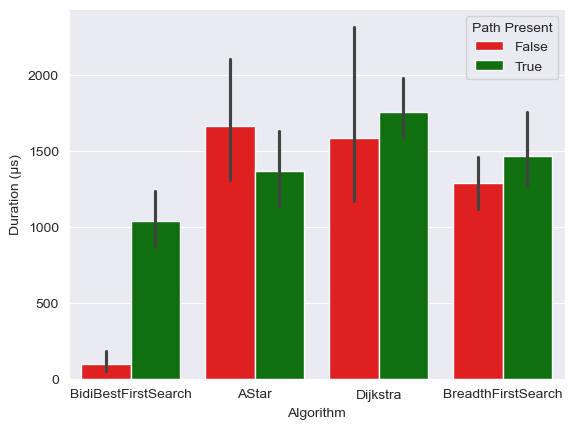

In [78]:
sns.barplot(benchmark, x='Algorithm', y='Duration (µs)', hue='Path Present', hue_order=[False, True], palette=['red', 'green'])

# Visit counts of algorithms where a path is present vs not present

<Axes: xlabel='Algorithm', ylabel='Visited Vertices'>

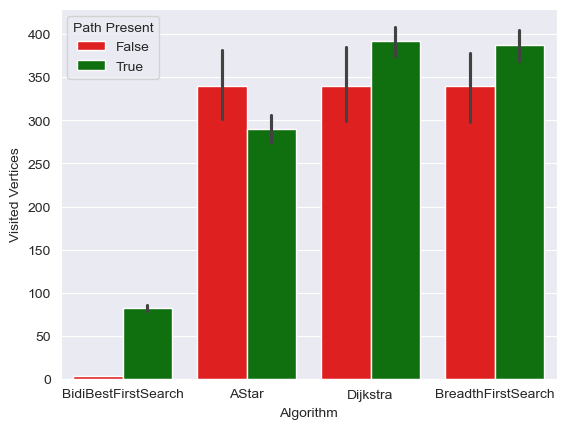

In [79]:
sns.barplot(benchmark, x='Algorithm', y='Visited Vertices', hue='Path Present', hue_order=[False, True], palette=['red', 'green'])

# Relationship between algorithm and path length

<Axes: xlabel='Algorithm', ylabel='Path Length'>

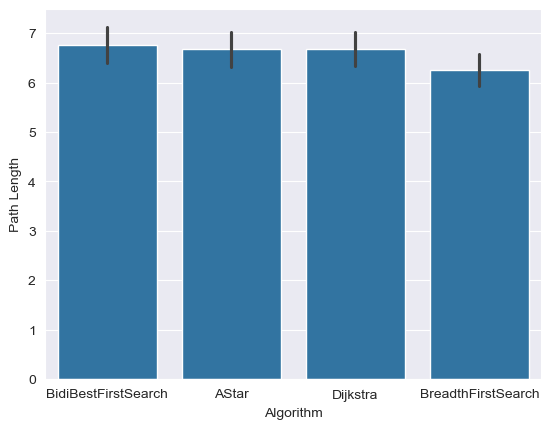

In [80]:
sns.barplot(benchmark, x='Algorithm', y='Path Length')

# Relationship between algorithm and path weight

<Axes: xlabel='Algorithm', ylabel='Path Weight'>

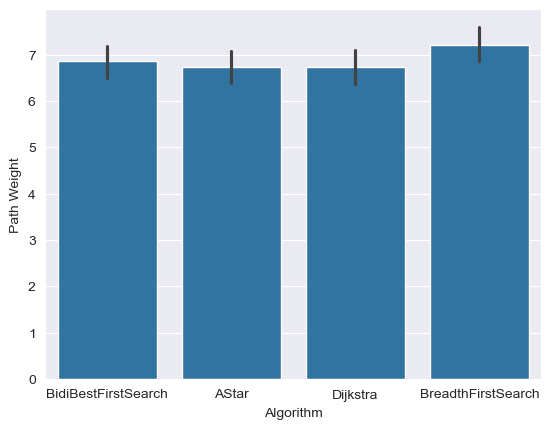

In [81]:
sns.barplot(benchmark, x='Algorithm', y='Path Weight')

# Relationship between visit count and duration

<Axes: xlabel='Visited Vertices', ylabel='Duration (µs)'>

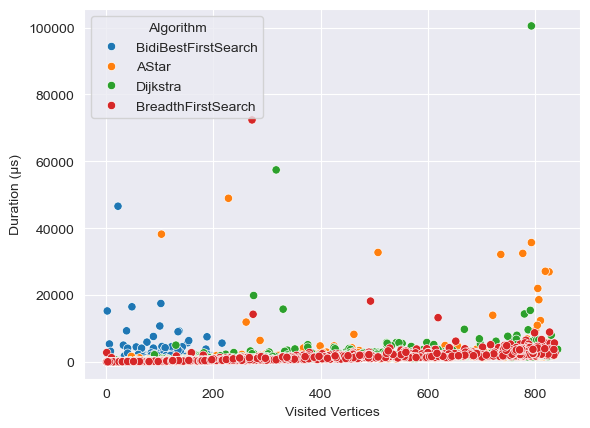

In [82]:
sns.scatterplot(benchmark, x='Visited Vertices', y='Duration (µs)', hue='Algorithm')

<Axes: xlabel='Visited Vertices', ylabel='Duration (µs)'>

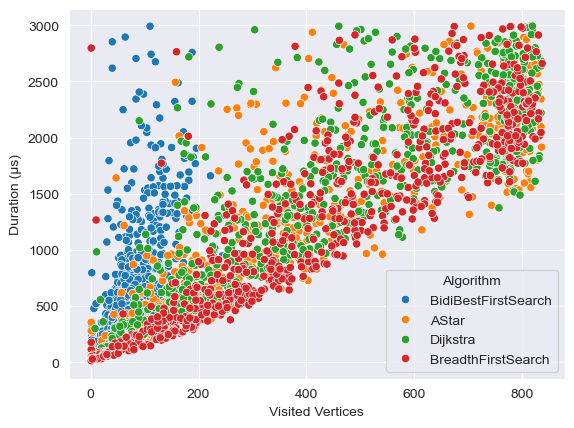

In [83]:
sns.scatterplot(benchmark[benchmark['Duration (µs)'] < 3000], x='Visited Vertices', y='Duration (µs)', hue='Algorithm')

# Relationship between path length and visit count

<Axes: xlabel='Path Length', ylabel='Visited Vertices'>

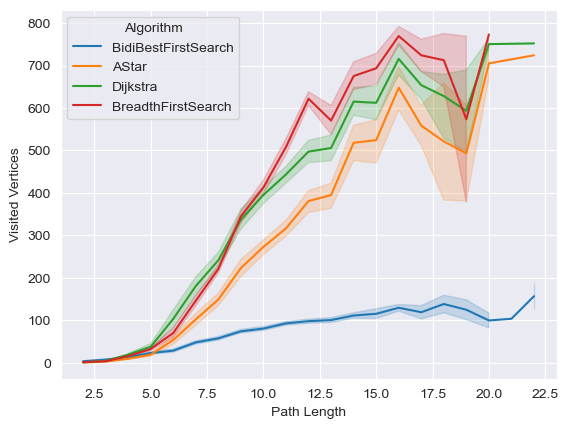

In [84]:
sns.lineplot(benchmark_path, x='Path Length', y='Visited Vertices', hue='Algorithm', errorbar=('ci', 75))

# Relationship between path weight and visit count

<Axes: xlabel='Path Weight', ylabel='Visited Vertices'>

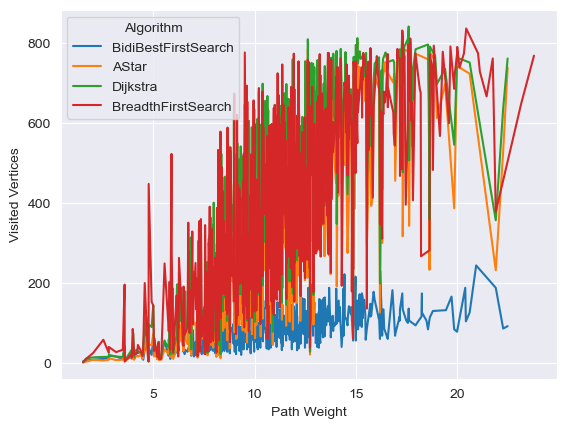

In [85]:
sns.lineplot(benchmark_path, x='Path Weight', y='Visited Vertices', hue='Algorithm')

# Relationship between path length and duration

<Axes: xlabel='Path Length', ylabel='Duration (µs)'>

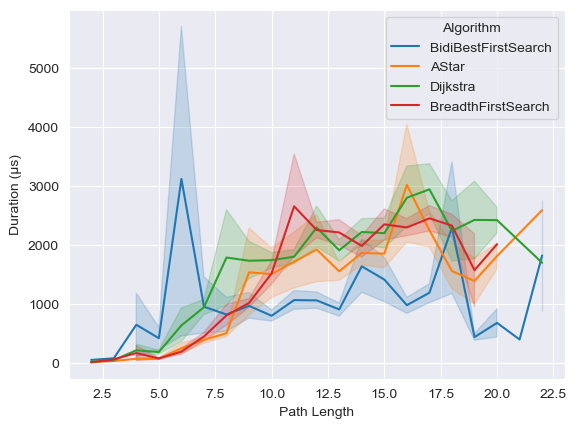

In [86]:
sns.lineplot(benchmark_path, x='Path Length', y='Duration (µs)', hue='Algorithm', errorbar=('ci', 75))

# Relationship between path weight and duration

In [ ]:
sns.lineplot(benchmark_path[benchmark_path['Duration (µs)'] < 5000], x='Path Weight', y='Duration (µs)', hue='Algorithm')

# Relationship between average degree and visit count

In [ ]:
sns.scatterplot(benchmark, x='Average Path Degree', y='Visited Vertices', hue='Algorithm')

# Relationship between average degree and duration

In [ ]:
sns.scatterplot(benchmark, x='Average Degree', y='Duration (µs)', hue='Algorithm')

In [ ]:
sns.scatterplot(benchmark[benchmark['Duration (µs)'] < 2000], x='Average Degree', y='Duration (µs)', hue='Algorithm')

# Relationship between path length and average degree

In [ ]:
sns.lineplot(benchmark, x='Path Length', y='Average Degree')

# Relationship between path length and average path degree

In [ ]:
sns.lineplot(benchmark, x='Path Length', y='Average Path Degree')

# Distribution of durations for each algorithm

In [ ]:
sns.histplot(benchmark[benchmark['Duration (µs)'] < 1500], x='Duration (µs)', hue='Algorithm')

# Distribution of visited vertices for each algorithm

In [ ]:
sns.histplot(benchmark, x='Visited Vertices', hue='Algorithm')

# Correlation Heatmap

In [ ]:
sns.heatmap(benchmark.corr(method='spearman', numeric_only=True), annot=True)